# Homework \#4 
# Air quality analysis for five major citites in the US





## 1 Introduction

The __2015 National Ambient Air Quality Standards (NAAQS) for Ozone__ is a rule by the ENVIRONMENTAL PROTECTION AGENCY
to set standards for air quality control / regulations [1].

It starts with a summary statement:  

"_SUMMARY: Based on its review of the air quality criteria for ozone (O3) and related photochemical oxidants and national ambient air quality standards (NAAQS) for O3, the Environmental Protection Agency (EPA) is revising the primary and secondary NAAQS for O3 to provide requisite protection of public health and welfare, respectively._"

Monitoring ozone concentrations is therefore important to be able to inform the public about human health risk when the ozone levels are too high. 

__A critical value is 0.07 ppm__. In addition the health risks increase with the time one is exposed to high ozone concentrations.

In this homework we ask you to apply the learned Python data visualization functions to present the data, explore the main features of the time series and describe the interesting pattern that you can identify by the visual inspection of the data. 

## 2 Data and Methods

### 2.1 Data

The data are organized in a typical spreadsheet-type data tables (in simple text format, the file endind is .csv).
Data are provided for five cities:

    - New York City
    - Houston
    - LA
    - Philadelphia
    - Phoenix

For each station a separate spreadsheet file is provided.

The data are arranged in columns. The columns have names and indicate what each data column is.
You will find a column with the dates and a column with the ozone data values in the table:

| Date	Site | ID         |	Daily Max 8-hour Ozone Concentration | UNITS | SITE_LATITUDE | SITE_LONGITUDE |
|------------|------------|--------------------------------------|-------|---------------|----------------|
| 1/1/2019   | 482011035  | 	                           0.027 | ppm	 |  29.733726	 |  -95.257593    |         
| 1/2/2019	 | 482011035  |                                0.022 | ppm	 |  29.733726	 |  -95.257593    |




### 2.2 Methods

We provide a function that allows you to read the data values into your Python script. The code in the first cell is importing the packages _numpy_ and  _matplotlib.pyplot_. We also use supporting functions and new data types to deal with spreadsheet data and dates: _pandas_ and _datetime_.  
__Don't forget to run the code with the import statements!__





In [1]:
%matplotlib inline
from IPython.display import HTML
from IPython.display import display

# import packages that we need to read the data files
# convert date strings into numerical values for plotting time series
# pandas is a powerful (but a bit more complicated) package to work with spreadsheet data
import pandas as pd
import datetime as dt 

# our two main packages for data analysis
import numpy as np
import matplotlib.pyplot as plt

The next cell down below includes code that defines a supporting function. We hide this part so you can focus on how the function is used. But if you are curious, have a look at the code. You can show/hide the cell by clicking in the 'click here' link.
 ## Make sure you run the script using menu 'Cell'/'Run All' at the beginning of a session or after restarting the kernel!!!

In [2]:

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
# script and data file are in the same directory 
# if not a path has to be added to the file name
#path="C:\Users\oe524132\Documents\2020_working_files_while_onedrive_issues_get_resolved\AENV497_Oliver_Miller_support\"


def load_data(city,pollutant='ozone'):
    """A supporting function to load ozone data from a csv file
    
    Args:
        city (str): A string for the city name (must match string in file names).
        pollutant (str): name of the pollutant (defaults to 'ozone')
            Use this second parameter to assign another string 
    
    Returns:
        x (numpy array): an array with the dates (values have type datetime)
        y (numpy array): an array with the concentration
    """
    path="/nfs/home11/staff/timm/Public/Data/hw2/"
    filename=city+'_'+pollutant+'.csv'
    try:
        open(path+filename,'r')
        is_file=True
        print (80*"+")
        print ("Load data for "+city+" pollutant: "+pollutant)
        print ("Local file is "+path+filename)
        print (80*"+")
    except:
        print("Warning: could not open file "+path+filename)
        is_file=False
    
    if is_file:
        df=pd.read_csv(path+filename)
        print(80*"-")
        print ("+ Name of data columns in the Pandas Dataframe:")
        for name in df.columns:
            print (name)
        print(80*"-")
        ########################################################
        # pre-processing of the data
        ########################################################
        
        ########################################################
        # 1. convert the date data (type string) into numerical 
        # values (useful for plotting in plt.plot)
        ########################################################
        
        dates=df['Date'] # extracts the column named 'Date' from dataframe
        datelist=[]
        n=0
        for d in dates: # dates is iterable
            # take the string and convert into a numerical value
            value=dt.datetime.strptime(d,'%m/%d/%y')
            datelist.append(value)
            n=n+1
        
        # 
        x=np.array(datelist) # convert the list with datetimevalues into numpy array
        
        ########################################################
        # 2. extract column with the ozone concentration data
        ########################################################
        # gets data in a type numpy array
        y=df['Daily Max 8-hour Ozone Concentration'].values 
        # units we expect to be the same in each row, so we get one cell value
        unit=df['UNITS'][0] 
        print ("Loaded the data successfully!")
        print ("Number of days in file: "+str(n))
        print ("Dates:"+str(x[0])+" to "+str(x[-1]))
        print ("Concentration values range from: ")
        print ("%12.4f to %12.4f" % (np.nanmin(y), +np.nanmax(y)))
        print ("Units: "+unit)
        
    else:
        print ("do else")
        
        x,y = np.nan, np.nan
    
    return x,y


### 2.2.1 How to apply the function load-data()

Python provides the function _help()_. You can use it the get information about functions,
data objects. Just call the function help with an argument, for example in the cell below we get help on 
the function *load_data*.

In [3]:
# we have defined a function in the (cells above)

help(load_data)

Help on function load_data in module __main__:

load_data(city, pollutant='ozone')
    A supporting function to load ozone data from a csv file
    
    Args:
        city (str): A string for the city name (must match string in file names).
        pollutant (str): name of the pollutant (defaults to 'ozone')
            Use this second parameter to assign another string 
    
    Returns:
        x (numpy array): an array with the dates (values have type datetime)
        y (numpy array): an array with the concentration



## 3  Your code for data visualization (40pts)

Develop your code in this section 3. Plot the time series so that you can easily analyze a single time series. 
But also try to find a good solution to allow for direct comparison two or more time series in one single plot.

specific tasks: 
- Load all five data and find a way to add labels and a legend.
- Label the coordinate axes in your plots.
- Use good colors (see link in the references [2]).

- Use creative ways to present the data (in several figures if needed)
    - so that we can see the time series for each city.
    - so you can support your main results and discussions in section 4 with supportive figures.



Note: we have five data files for these cities:

| City          | String to use in function  load_data()  |
|---------------|-----------------------------------------|
| New York City | 'nyc'                                   |
| Los Angeles   | 'los_angeles'                           |
| Houston       | 'houston_tx'                            |
| Philadelphia  | 'philadelphia_pa'                       |
| Phoenix       | 'phoenix_az'                            |



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Load data for nyc pollutant: ozone
Local file is /nfs/home11/staff/timm/Public/Data/hw2/nyc_ozone.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------------------------------------
+ Name of data columns in the Pandas Dataframe:
Date
Site ID
Daily Max 8-hour Ozone Concentration
UNITS
SITE_LATITUDE
SITE_LONGITUDE
Unnamed: 6
Unnamed: 7
--------------------------------------------------------------------------------
Loaded the data successfully!
Number of days in file: 365
Dates:2019-01-01 00:00:00 to 2019-12-31 00:00:00
Concentration values range from: 
      0.0070 to       0.0810
Units: ppm
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Load data for los_angeles pollutant: ozone
Local file is /nfs/home11/staff/timm/Public/Data/hw2/los_angeles_ozone.csv
+++++++++++++++++++++++++++++++++++++++

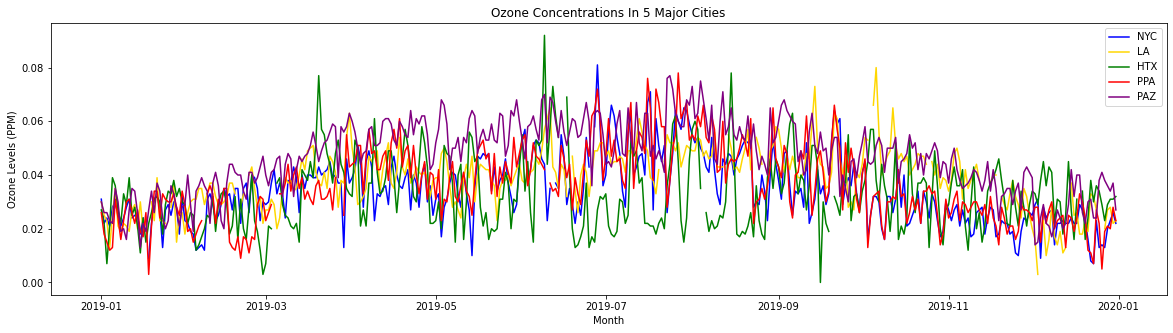

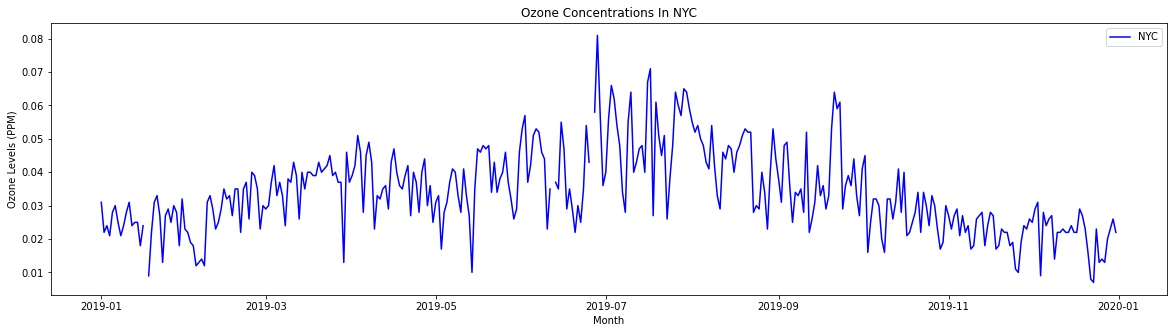

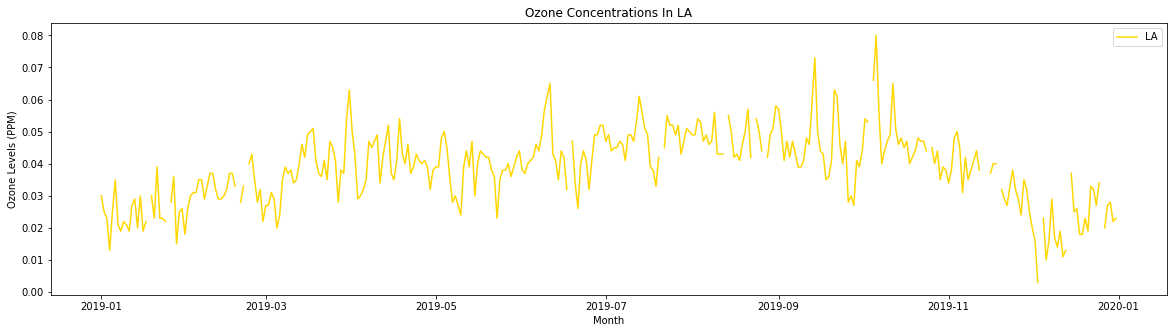

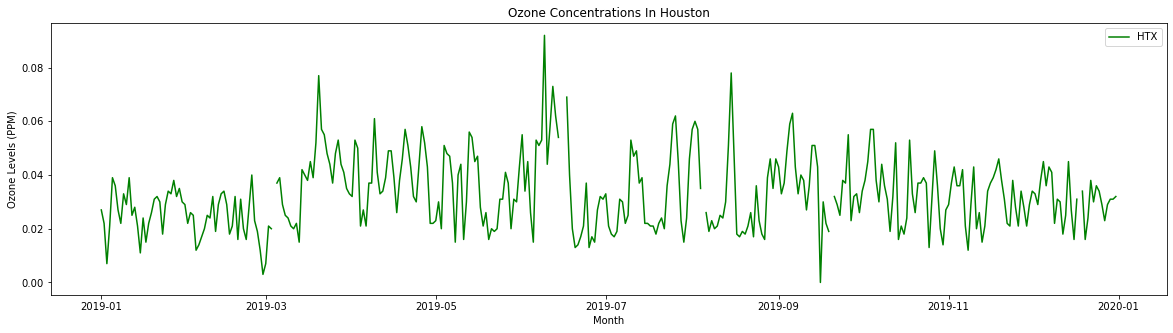

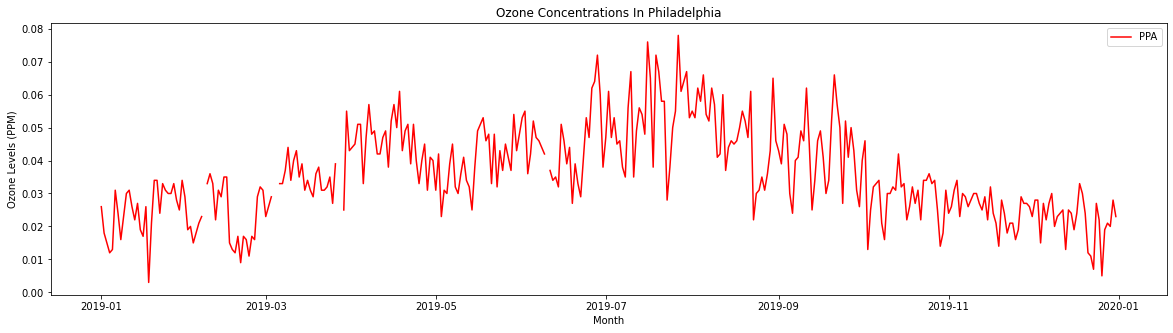

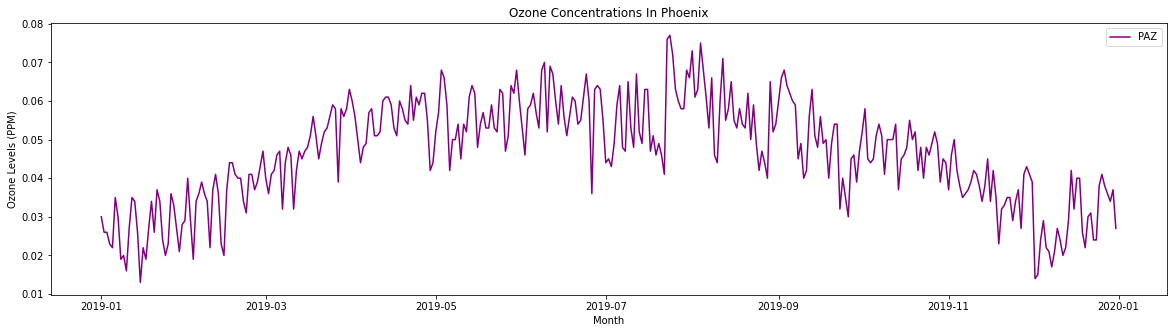

In [19]:
time_nyc,ozone_nyc=load_data('nyc','ozone')
x,y=time_nyc,ozone_nyc
a,b=load_data('los_angeles','ozone')
c,d=load_data('houston_tx','ozone')
e,f=load_data('philadelphia_pa','ozone')
g,h=load_data('phoenix_az','ozone')

# the above code sets variables to each array

plt.figure(figsize=(20,5))
plt.plot(x,y,'blue',label='NYC')
plt.plot(a,b,'gold',label='LA')
plt.plot(c,d,'green',label='HTX')
plt.plot(e,f,'red',label='PPA')
plt.plot(g,h,'purple',label='PAZ')
plt.title('Ozone Concentrations In 5 Major Cities')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot with every time series on one

plt.figure(figsize=(20,5))
plt.plot(x,y,'blue',label='NYC',)
plt.title('Ozone Concentrations In NYC')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot for New York City

plt.figure(figsize=(20,5))
plt.plot(a,b,'gold',label='LA')
plt.title('Ozone Concentrations In LA')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot for Los Angeles

plt.figure(figsize=(20,5))
plt.plot(c,d,'green',label='HTX')
plt.title('Ozone Concentrations In Houston')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot for Houston

plt.figure(figsize=(20,5))
plt.plot(e,f,'red',label='PPA')
plt.title('Ozone Concentrations In Philadelphia')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot for Philadelphia

plt.figure(figsize=(20,5))
plt.plot(g,h,'purple',label='PAZ')
plt.title('Ozone Concentrations In Phoenix')
plt.xlabel('Month')
plt.ylabel('Ozone Levels (PPM)')
plt.legend()
plt.show()

# the above code creates a plot for Phoenix

## 4 Results and discussion of the data analysis (55pts)

- Analysze carefully the data and summarize the important observations that you have made. Make sure you address the following questions:
     - Which city or cities show a seasonal signal (e.g. winter higher ozone concentration than summer)? (__5__)
     - Which city has on average the highest concentration in 2019? (__10__)
     - Which city has the largest day-to-day (on time scales <30 days) variations in the concentrations? (__10__)
     - Which has the most days exceeding the critical value? (__10__)
     - Discuss environmental and meteorological factors that can potentially explain seasonality and the observed 
    fluctuations in the time series (short discussion of 2-3 major factors). (__20__)
    
### NOTE: We do not expect from you that you develop code to do any calculations (but if you want you can, of course). It is sufficient to look at the graphs and inspect the data visually to achieve 55 pts! However, the plots you have to adjust so that it is easy to do the analysis in a quantitative way.

1) Philadelphia, Phoenix, and New York City seem to show a seasonal signal of higher ozone concentration in the summer than in the winter. 

2) Phoenix, AZ had the highest average ozone concentrations in 2019.

3) Houston, TX had the largest variations in concentrations on the day-to-day time scale. 

4) Houston, TX had the most days exceeding the critical value. 

5) One of the factors that causes fluctuations in the time series is the angle of solar raditation and how it changes throughout the year. One of the processes that creates ozone in the atmosphere depends on solar radiation to catalyze the process. Another factor that changes the ozone concentrations throughout the year are certain atmospheric conditions. The atmopshere is more conducive to tropospheric ozone buildup in stable conditions, like all pollutants. Methane and carbon dioxide are also precursors to ozone, and with higher emissions of these two greenhouse gases, ozone is more likely to be produced. 

## 5 Summary and concluding remarks (5pts)

Through this homework, we were able to create plots for the ozone concentrations across a year for 5 major U.S. cities. We were provided with code that let us extract data from the EPA in order to plot it. This allowed us to work with matplotlib, and produce data in a way that we could analyze it well. We answered 5 questions by analyzing this data. 

--- 

## 6 References

Add here your sources that you used (e.g. EPA information on the atmospheric chemistry of ozone pollution or health risks)

 
    
1. [EPA web page with the detailed information on the National Ambient Air Quality Standards (NAAQS) for Ozone](https://www.epa.gov/ground-level-ozone-pollution/2015-revision-2008-ozone-national-ambient-air-quality-standards-naaqs)

2. [Color names defined in matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

Note to the grading: Use markdown cells and some supportive highlighting and good structure in Section 4 and 5. Points will be deducted if the format is of poor quality!